In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("magic04.data")

In [7]:
df.columns = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]

In [8]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,g


In [9]:
df.replace({"g": 0, "h": 1}, inplace=True)

# random oversampling technique

In [10]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [11]:
df['class'].value_counts()

,count
class,
0,12331
1,6688


In [12]:
# here we will sample the data for better classification


In [27]:
# prompt: sample the data using the oversampling technique

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=40)
x_resampled, y_resampled = ros.fit_resample(x, y)

# Check the number of samples in each class after oversampling
from collections import Counter
print(sorted(Counter(y_resampled).items()))


[(0, 12331), (1, 12331)]


In [32]:
# split the data into the training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=45)

In [33]:
# prompt: generate the logisctic regression model , train and test the model , and return the accuracy report

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

print(report)


              precision    recall  f1-score   support

           0       0.75      0.83      0.79      2475
           1       0.81      0.73      0.76      2458

    accuracy                           0.78      4933
   macro avg       0.78      0.78      0.78      4933
weighted avg       0.78      0.78      0.78      4933



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
print("training accuracy" , model.score(x_train, y_train)*100)
print("testing accuracy" , model.score(x_test, y_test)*100)

training accuracy 76.79558011049724
testing accuracy 77.64038110683154


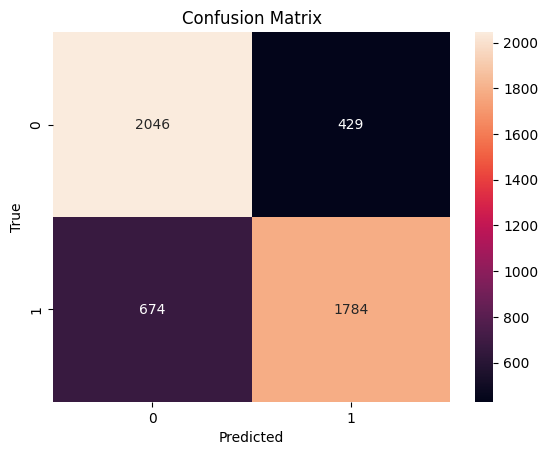

In [35]:
# prompt: draw the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# random undersampling technique

In [36]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,0
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,1
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,1
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,1
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,1


In [37]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [43]:
# sample the data using the undersampling technique
from imblearn.under_sampling import RandomUnderSampler
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority' , random_state=40)
# fit and apply the transform
X_over, y_over = undersample.fit_resample(x, y)
#

In [44]:
from collections import Counter
print(sorted(Counter(y_over).items()))

[(0, 6688), (1, 6688)]


In [51]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [52]:
# prompt: generate the logistic regression model , train and test the model and return the classification report

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(x_train1, y_train1)

# Make predictions on the test data
y_pred = model.predict(x_test1)

# Generate the classification report
report = classification_report(y_test1, y_pred)

print(report)


              precision    recall  f1-score   support

           0       0.76      0.82      0.79      1329
           1       0.81      0.74      0.77      1347

    accuracy                           0.78      2676
   macro avg       0.78      0.78      0.78      2676
weighted avg       0.78      0.78      0.78      2676



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
